In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

In [10]:
#read data into dataframes
data = pd.read_excel("data/eurovision_song_contest_1975_2019.xlsx")
borders = pd.read_excel("data/GEODATASOURCE-COUNTRY-BORDERS EDITED.xlsx", header = 1)

In [11]:
#data exploration and cleaning
data.rename(columns = {"Points      ":"Points"}, inplace = True)
columns = list(data.columns)

from_c = sorted(data["From country"].unique())
to_c = sorted(data["To country"].unique())

diff = list(set(from_c) - set(to_c))
print(diff)

#renaming countries in the voting dataset
data["From country"] = data["From country"].replace(["The Netherands"],["The Netherlands"])
data["From country"] = data["From country"].replace(["F.Y.R. Macedonia"],["North Macedonia"])
data["From country"] = data["From country"].replace(["Macedonia"],["North Macedonia"])

data["To country"] = data["To country"].replace(["F.Y.R. Macedonia"],["North Macedonia"])
data["To country"] = data["To country"].replace(["Macedonia"],["North Macedonia"])


print(data["From country"].unique())

['The Netherands']
['Belgium' 'Finland' 'France' 'Germany' 'Ireland' 'Israel' 'Italy'
 'Luxembourg' 'Malta' 'Monaco' 'Norway' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'The Netherlands' 'Turkey' 'United Kingdom' 'Yugoslavia'
 'Austria' 'Greece' 'Denmark' 'Morocco' 'Cyprus' 'Iceland'
 'Bosnia & Herzegovina' 'Croatia' 'Slovenia' 'Estonia' 'Hungary'
 'Lithuania' 'Poland' 'Romania' 'Russia' 'Slovakia' 'North Macedonia'
 'Latvia' 'Ukraine' 'Albania' 'Andorra' 'Belarus' 'Serbia & Montenegro'
 'Bulgaria' 'Moldova' 'Armenia' 'Czech Republic' 'Georgia' 'Montenegro'
 'Serbia' 'Azerbaijan' 'San Marino' 'Australia']


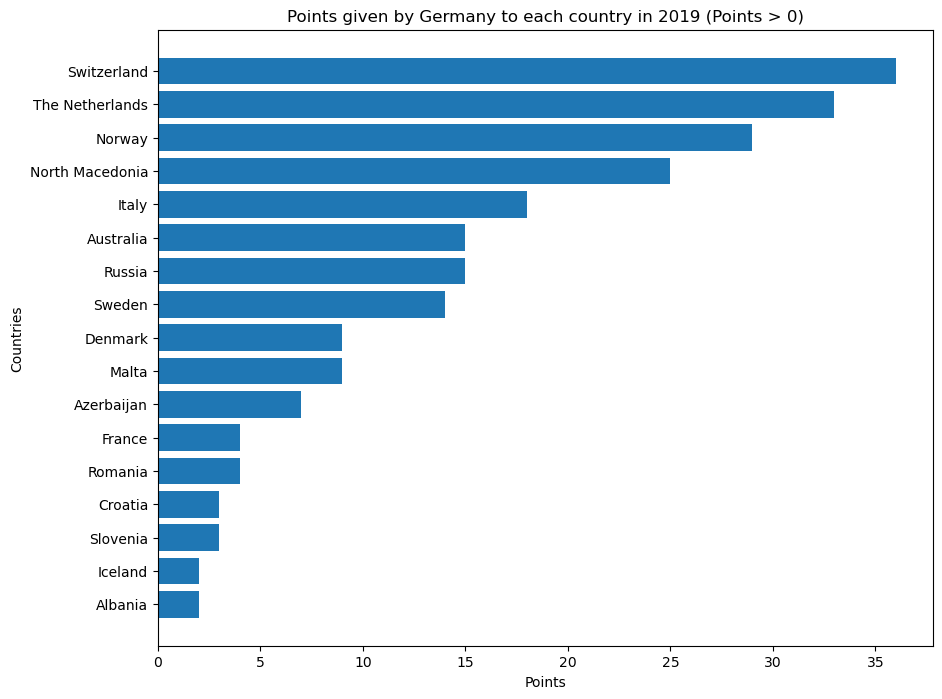

In [12]:
#plot the votes of the specific country in the specific year

country = 'Germany'
year = 2019

filtered_data = data[(data['Year'] == year) & (data['From country'] == country)]

#group the filtered data by the 'To country' column and sum the points
grouped_data = filtered_data.groupby('To country')['Points'].sum().reset_index()

#filter the grouped data for points greater than 0
filtered_grouped_data = grouped_data[grouped_data['Points'] > 0]

#sort the filtered grouped data by the points in ascending order
sorted_data = filtered_grouped_data.sort_values('Points', ascending=True)

#plot the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_data['To country'], sorted_data['Points'])
plt.xlabel('Points')
plt.ylabel('Countries')
plt.title('Points given by {country} to each country in {year} (Points > 0)'.format(country = country, year = year))
plt.show()

<Figure size 3000x4000 with 0 Axes>

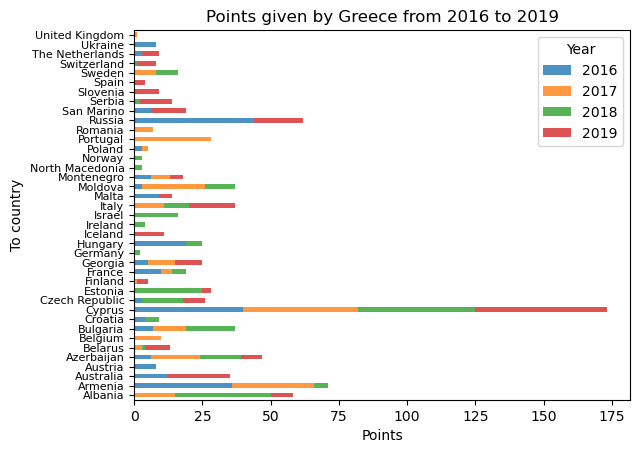

In [13]:
#plot the votes of the specific country in the range of years

country = 'Greece'

#filter the data
data_filtered = data[(data['From country'] == country) & (data['Year'].between(2016, 2019))]

data_filtered = data_filtered[(data_filtered['Points'] > 0)]

#group the data by country and year, sum the points
data_grouped = data_filtered.groupby(['To country','Year'])['Points'].sum().unstack()

#plot
plt.figure(figsize=(30, 40))  
data_grouped.plot(kind='barh', stacked=True,alpha = 0.8,color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

#adjust y-axis label size
plt.yticks(fontsize=8)
plt.xlabel('Points')
plt.title('Points given by {country} from 2016 to 2019'.format(country = country))
plt.show()

In [14]:
borders_columns = borders.columns
print(borders_columns)

Index(['country_code', 'country_name', 'country_border_code',
       'country_border_name'],
      dtype='object')


Neighbouring countries max points:  6.335766423357664
Neighbouring countries min points:  2.1153846153846154
Neighbouring countries mean points:  4.2291369931935145
Non-neighbouring countries max points:  3.175
Non-neighbouring countries min points:  1.8866133866133865
Non-neighbouring countries mean points:  2.5423076088282635


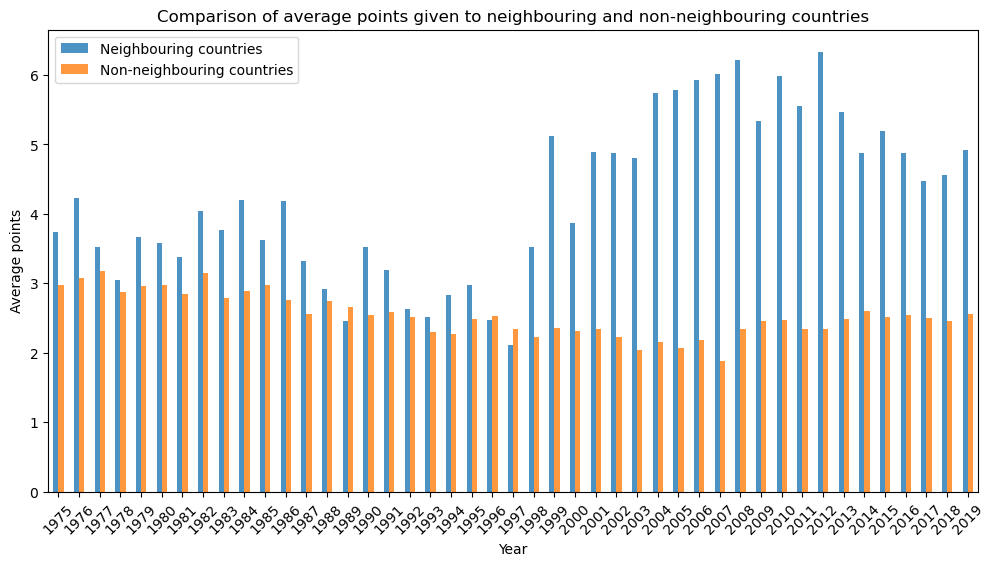

In [15]:
#plot the comparison of neighbouring and non-neighbouring countries voting


#filter the borders dataset to include only countries present in eurovision
countries_in_data = data['From country'].unique()
borders_filtered = borders[borders['country_name'].isin(countries_in_data)]

#create a dictionary where the keys are the countries and the values are lists of their neighbours
neighbours_dict = borders_filtered.groupby('country_name')['country_border_name'].apply(list).to_dict()

#add a column to the 'data' indicating whether each row represents neighbours
data['Neighbour'] = data.apply(lambda row: row['To country'] in neighbours_dict.get(row['From country'], []), axis=1)

#split into neighbouring and non-neighbouring dataframes and group by year, calculate the mean points
mean_points_neighbouring = data[data['Neighbour']].groupby('Year')['Points'].mean()
mean_points_non_neighbouring = data[~data['Neighbour']].groupby('Year')['Points'].mean()


#print out voting statistics
print("Neighbouring countries max points: ", mean_points_neighbouring.max())
print("Neighbouring countries min points: ", mean_points_neighbouring.min())
print("Neighbouring countries mean points: ", mean_points_neighbouring.mean())
print('Non-neighbouring countries max points: ', mean_points_non_neighbouring.max())
print('Non-neighbouring countries min points: ', mean_points_non_neighbouring.min())
print('Non-neighbouring countries mean points: ', mean_points_non_neighbouring.mean())


#combine mean dataframes
mean_points_df = pd.DataFrame({'Neighbouring countries': mean_points_neighbouring,
                               'Non-neighbouring countries': mean_points_non_neighbouring})

#plot
mean_points_df.plot(kind='bar', figsize=(12, 6), alpha = 0.8, color =['#1f77b4', '#ff7f0e'])
plt.ylabel('Average points')
plt.title('Comparison of average points given to neighbouring and non-neighbouring countries')
plt.xticks(rotation = 45)  

plt.show()


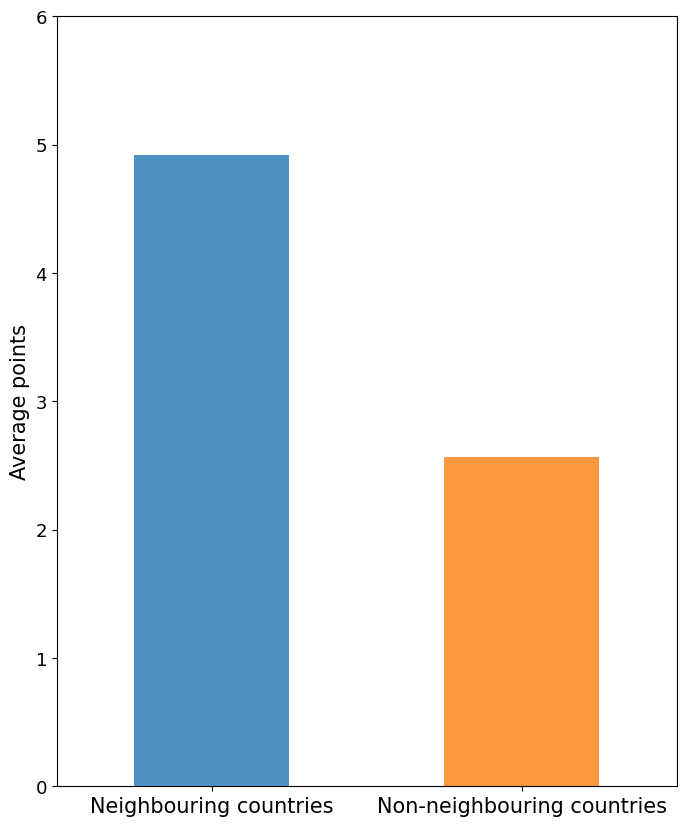

In [16]:
#close up plot for the last year of voting

mean_points_2019 = mean_points_df.iloc[-1]
#plot
mean_points_2019.plot(kind='bar', figsize=(8, 10), alpha = 0.8, color =['#1f77b4', '#ff7f0e'])

plt.ylabel('Average points', fontsize = 15)
#plt.title('Comparison of average points given to neighbouring and non-neighbouring countries in 2019', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 15)  
plt.ylim(0, 6)
plt.yticks(fontsize = 13)

plt.show()